## Homework

Solve the same equations using scipy.integrate.odeint and scipy.integrate.solve_ivp

$$
\frac{dx}{dt}=\sigma (y-x) \\
\frac{dy}{dt}=x(\rho-z) -y \\
\frac{dz}{dt}=xy-\beta z 
$$
for the parameters:

$\sigma =10$
$\rho=28$
$\beta=8/3$
lets set intial conditions:

x(0)=1.0
y(0)=1.0
z(0)=1.0

In [1]:
#Libraries
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


#parametros
σ = 10.0
β = 8.0 / 3.0
ρ = 28.0

t_span = [0, 35.0]
y = [1.0, 1.0, 1.0]

t = np.arange(t_span[0],t_span[1],0.01)

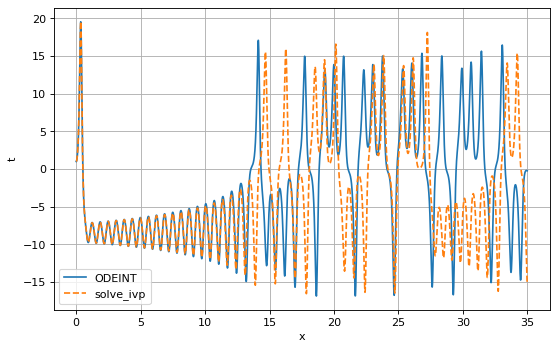

In [2]:
#scipy.integrate.odeint

def derivs(y,x):
    dydx = np.zeros(3)
    dydx[0] = σ * (y[1] - y[0])
    dydx[1] = y[0] * (ρ - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - β * y[2]
    return dydx

sols1 = odeint(derivs, y , t )
#print(sols1)
#scipy.integrate.solve_ivp

def derivs(x,y):
    dydx = np.zeros(3)
    dydx[0] = σ * (y[1] - y[0])
    dydx[1] = y[0] * (ρ - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - β * y[2]
    return dydx

sols2 = solve_ivp(derivs, t_span, y, method='RK45', t_eval= t)

#print(sols2.y)

#plot x vs t

plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t, sols1[:, 0],label ="ODEINT")
plt.plot(t, sols2.y[0],'--',label ="solve_ivp")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.grid();

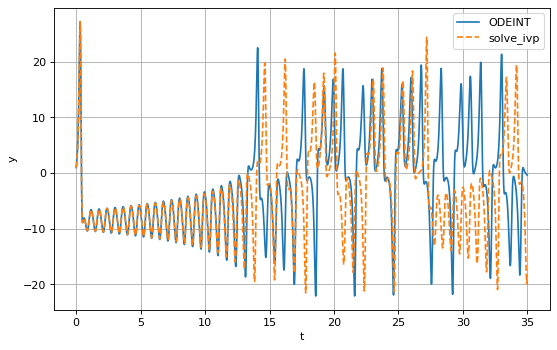

In [3]:
#plot y vs t

plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t, sols1[:, 1],label ="ODEINT")
plt.plot(t, sols2.y[1],'--',label ="solve_ivp")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid();

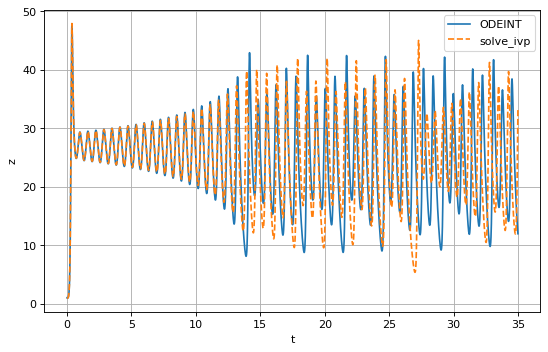

In [4]:
# Plot z vs t
plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t, sols1[:, 2],label ="ODEINT")
plt.plot(t, sols2.y[2],'--',label ="solve_ivp")
plt.xlabel("t")
plt.ylabel("z")
plt.legend()
plt.grid();

Después de cierto tiempo la diferencia entre ambas soluciones se hace más notoria.

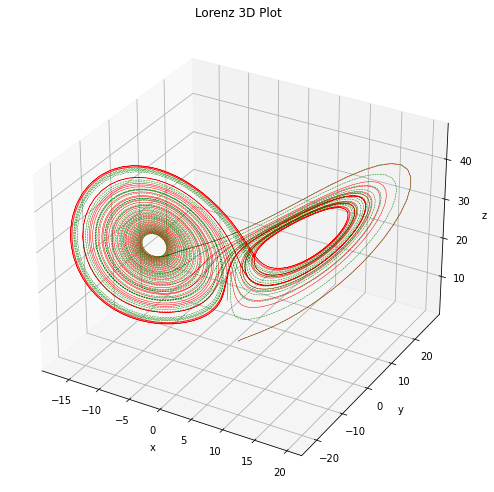

In [5]:
#Plot 3D
fig = plt.figure ( figsize = (8.5,8.5))
ax = fig.gca ( projection = '3d' )
ax.plot( sols1[:, 0], sols1[:, 1], sols1[:, 2], linewidth = 0.5, color = 'r' )
ax.plot( sols2.y[0], sols2.y[1], sols2.y[2], '--g',linewidth = 0.5 )
ax.set_xlabel( 'x' )
ax.set_ylabel( 'y' )
ax.set_zlabel( 'z' )
ax.set_title( 'Lorenz 3D Plot' );